<a href="https://colab.research.google.com/github/Aishwarya-RaviK/Linear-Regression-/blob/main/Linear_Regression5_6_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [87]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

In [88]:
df

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 


1.Data Jar -----> Cleaning, Encoding, Splitting, Scaling

In [89]:
df.isnull().sum()

Chirps/Second         0
Ground Temperature    0
dtype: int64

There are no null values 

In [90]:
df.drop_duplicates

<bound method DataFrame.drop_duplicates of     Chirps/Second  Ground Temperature
0            20.0                88.6
1            16.0                71.6
2            19.8                93.3
3            18.4                84.3
4            17.1                80.6
5            15.5                75.2
6            14.7                69.7
7            15.7                71.6
8            15.4                69.4
9            16.3                83.3
10           15.0                79.6
11           17.2                82.6
12           16.0                80.6
13           17.0                83.5
14           14.4                76.3>

In [91]:
df.shape

(15, 2)

No duplicates also 

In [92]:
df.describe()

,Chirps/Second,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


In [93]:
q3=np.quantile(df['Ground Temperature'],q=0.75)
q1=np.quantile(df['Ground Temperature'],q=0.25)
iqr=q3-q1

In [94]:
lower_threshold=q1-1.5*iqr 
upper_threshold=q3+ 1.5*iqr 
print(upper_threshold , lower_threshold)

98.4 58.400000000000006


In [95]:
q3=np.quantile(df['Chirps/Second'],q=0.75)
q1=np.quantile(df['Chirps/Second'],q=0.25)
iqr=q3-q1

In [96]:
lower_threshold=q1-1.5*iqr 
upper_threshold=q3+ 1.5*iqr 
print(upper_threshold , lower_threshold)

19.699999999999996 12.9


In [97]:
df.corr()

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


There is a relationship infact a linear relationship between the feature and the target so we can continue with linear regression without transforming

In [98]:
X=df[['Ground Temperature']]
y=df[['Chirps/Second']]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=4)

In [99]:
from sklearn.preprocessing import StandardScaler 
scale=StandardScaler()
scale.fit(X_train)
X_train_scaled=scale.transform(X_train)
X_test_scaled=scale.transform(X_test)

In [100]:
from sklearn.linear_model import LinearRegression 
reggressor=LinearRegression()
reggressor.fit(X_train,y_train)

LinearRegression()

In [101]:
y_pred=reggressor.predict(X_test)

In [102]:
c=reggressor.intercept_

In [103]:
m=reggressor.coef_

**TASK-1** The equation y=mx+c -------> **y = 0.178(x) + 2.34**

 **TASk-2** Actual vs Predicted

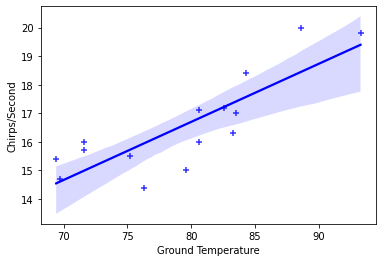

In [104]:
import seaborn as sns 
ax=sns.regplot(x='Ground Temperature',y='Chirps/Second',data=df,color='blue',marker='+')

**TASK-3** R2 Score

In [105]:
from sklearn import metrics

In [106]:
a=metrics.r2_score(y_test,y_pred)
print(a)

0.7406754248086319


The **r2 score** is **0.7406** which is a slightly below par r2 score

**TASK-4** Extrapolate data when x=95

In [107]:
reggressor.predict([[95]]).reshape(-1,1)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[19.28879902]])

**TASK-5** Interpolate data when x= 18

y = m * x + c

y - c = m * x

(y - c) / m = x

x = (y - c) / m

In [108]:
def chirps_pred(tem):
  x=(tem-reggressor.intercept_)/(reggressor.coef_)
  print(x)
chirps_pred(18)

[[87.77611389]]


At 18 chirps/sec as an observation the temperature of the particular day might be 87.7˚F

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [109]:
df = pd.read_fwf("brain_body.txt")

In [110]:
df.dtypes

Brain    float64
Body     float64
dtype: object

In [111]:
df.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [112]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [113]:
q3=np.quantile(df['Brain'],q=0.75)
q1=np.quantile(df['Brain'],q=0.25)
iqr=q3-q1

In [114]:
lower_threshold=q1-1.5*iqr 
upper_threshold=q3+ 1.5*iqr 
print(upper_threshold , lower_threshold)

119.60625 -70.80375000000001


In [115]:
df['Brain']=df['Brain'].clip(lower_threshold,upper_threshold)

In [116]:
df['Brain'].describe()

count     62.000000
mean      29.176476
std       45.213842
min        0.005000
25%        0.600000
50%        3.342500
75%       48.202500
max      119.606250
Name: Brain, dtype: float64

In [117]:
q3=np.quantile(df['Body'],q=0.75)
q1=np.quantile(df['Body'],q=0.25)
iqr=q3-q1

In [118]:
lower_threshold=q1-1.5*iqr 
upper_threshold=q3+ 1.5*iqr 
print(upper_threshold , lower_threshold)

408.625 -238.375


In [119]:
df['Body']=df['Body'].clip(lower_threshold,upper_threshold)

In [120]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,29.176476,104.676532
std,45.213842,148.635231
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,119.606250,408.625000


In [121]:
X=df[['Brain']]
y=df[['Body']]


In [122]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=4)

In [123]:
from sklearn.preprocessing import StandardScaler 
scale=StandardScaler()
scale.fit(X_train)
X_train_scaled=scale.transform(X_train)
X_test_scaled=scale.transform(X_test)

In [124]:
from sklearn.linear_model import LinearRegression 
reggressor=LinearRegression()
reggressor.fit(X_train,y_train) 


LinearRegression()

In [125]:
y_pred=reggressor.predict(X_test)

In [126]:
reggressor.intercept_

array([19.41541133])

In [127]:
reggressor.coef_

array([[2.76356051]])

**TASK-1** The equation is y = 2.76x + 19.415

In [128]:
from sklearn import metrics
a=metrics.r2_score(y_test,y_pred)
print(a)

0.7912295308467509


**TASK-2** Actual vs Predicted

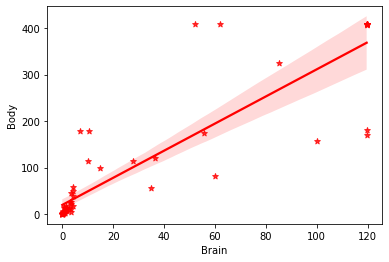

In [129]:
import seaborn as sns 
ax=sns.regplot(x='Brain',y='Body',color='red',marker='*',data=df)

**TASK-3** The r2-score is 0.7912 which is very close to 0.8 so this makes it a very good model

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [130]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [131]:
df

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696
5,0,3,16,1,21,28516
6,1,3,0,0,32,24900
7,0,3,16,1,18,31909
8,0,3,13,0,30,31850
9,0,3,13,0,31,32850


In [132]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


In [133]:
q3=np.quantile(df['Year'],q=0.75)
q1=np.quantile(df['Year'],q=0.25)
iqr=q3-q1

In [134]:
upper_threshold=q3+1.5*iqr 
lower_threshold = q1-1.5*iqr 
print(upper_threshold,lower_threshold)

23.0 -9.0


In [135]:
df['Year']=df['Year'].clip(lower_threshold,upper_threshold)

In [136]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.442308,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.388490,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,23.000000,1.000000,35.000000,38045.000000


In [137]:
q3=np.quantile(df['YSdeg'],q=0.75)
q1=np.quantile(df['YSdeg'],q=0.25)
iqr=q3-q1

In [138]:
upper_threshold=q3+1.5*iqr 
lower_threshold = q1-1.5*iqr 
print(upper_threshold,lower_threshold)

48.0 -18.0


In [139]:
X=df[['Sex','Rank','Year','Degree','YSdeg']]
y=df[['Salary']]

In [140]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=4)

In [141]:
from sklearn.preprocessing import StandardScaler 
scale=StandardScaler()
scale.fit(X_train)
X_train_scaled=scale.transform(X_train)
X_test_scaled=scale.transform(X_test)

In [142]:
from sklearn.linear_model import LinearRegression 
reggressor=LinearRegression()
reggressor.fit(X_train,y_train)

LinearRegression()

In [143]:
reggressor.intercept_

array([11193.63748411])

In [144]:
reggressor.coef_

array([[1211.28174022, 5294.50305899,  529.15189007, -767.92089597,
        -106.80412588]])

In [145]:
df.columns

Index(['Sex', 'Rank', 'Year', 'Degree', 'YSdeg', 'Salary'], dtype='object')

In [146]:
y_pred=reggressor.predict(X_test)

**TASK-1**  The equation y= 1211.28(Sex)+5295.5(Rank)+529.15(Year)+(-767.9)(Degree) +(-106.8)(YSdeg) + 11193..63

In [147]:
from sklearn import metrics
a=metrics.r2_score(y_test,y_pred)
print(a)

0.8572272665955708


**TASK-2** The r2-score is 0.857

In [148]:
a=reggressor.coef_
a
data={'features':['Sex','Rank','Year','Degree','YSdeg'],'Coefficient':[1211.28,529.5,529.15,-767.9,-106.8]}
d=pd.DataFrame(data)

In [149]:
d

,features,Coefficient
0,Sex,1211.28
1,Rank,529.50
2,Year,529.15
3,Degree,-767.90
4,YSdeg,-106.80


**TASK-3** The features which has greater impact is sex. (since it has higher coefficient)